**Set environment**

In [6]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
suppressMessages(suppressWarnings(library("DESeq2")))
suppressMessages(suppressWarnings(library("edgeR")))
suppressMessages(suppressWarnings(library("GGally")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_CombEffect_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_CombEffect_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_CombEffect_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_CombEffect_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_CombEffect_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_CombEffect_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_CombEffect_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_CombEffect_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_CombEffect_ENCODE_FCC/references 



In [3]:
TXT_ASSAY = "STARR_ATAC_K562_Reddy_KS91"

In [4]:
###
txt_assay         = TXT_ASSAY
txt_region_folder = "encode_open_chromatin"
txt_region_label  = "atac_ENCFF333TAT"

###
txt_fdiry = file.path(
    FD_RES, "assay_fcc", txt_assay, "coverage", 
    txt_region_folder, 
    txt_region_label, 
    "summary"
)

txt_fname = "data_list_count_column.rds"
txt_fpath = file.path(txt_fdiry, txt_fname)
lst = readRDS(txt_fpath)

txt_fname = "data_deseq2.rds"
txt_fpath = file.path(txt_fdiry, txt_fname)
dds = readRDS(txt_fpath)


###
lst_dat_ocr_atac_ENCFF333TAT = lst
dds_ocr_atac_ENCFF333TAT = dds

In [8]:
lst = lst_dat_ocr_atac_ENCFF333TAT
dds = dds_ocr_atac_ENCFF333TAT

dat_col = lst$data_col
dat_cnt = lst$data_cnt
vec_row = setNames(dat_cnt$Chrom, dat_cnt$Region)

mat_cnt_unrm = counts(dds, normalized = FALSE)
mat_cnt_norm = counts(dds, normalized = TRUE)

In [9]:
head(mat_cnt_unrm)

,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Output.rep1,Output.rep2,Output.rep3,Output.rep4
chr1:40649-41403,1,0,2,1,1,1,1,0,0,0
chr1:42030-42399,0,0,0,0,0,1,0,0,0,0
chr1:46255-47025,4,4,4,4,3,3,0,0,0,0
chr1:67629-67864,0,0,1,0,0,0,0,0,0,0
chr1:68056-68341,1,2,2,0,1,1,0,0,0,3
chr1:68963-70035,24,29,20,25,23,19,0,0,0,5


In [22]:
dge = DGEList(counts = mat_cnt_unrm, group = dat_col$Group)

In [7]:
filterByExpr

function (y, ...) 
UseMethod("filterByExpr")
<bytecode: 0x5653eaea4048>
<environment: namespace:edgeR>

In [23]:
mat = mat_cnt_unrm
print(dim(mat))

idx = filterByExpr(mat, min.count=10)
mat = mat[idx,]
print(dim(mat))
head(mat)

[1] 161187     10


No group or design set. Assuming all samples belong to one group.



[1] 149615     10


,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Output.rep1,Output.rep2,Output.rep3,Output.rep4
chr1:87574-88453,61,79,94,83,78,81,11,8,7,14
chr1:267975-268142,280,353,362,335,330,298,12,44,33,46
chr1:268732-269273,58,71,79,64,76,77,12,3,10,15
chr1:778339-779268,7304,8576,8809,8458,8425,7842,2569,3656,3967,7288
chr1:796049-796861,119,157,152,144,145,126,6,14,15,33
chr1:797423-797975,51,73,76,75,76,61,2,11,7,8


In [24]:
mat = mat_cnt_unrm
print(dim(mat))

idx = filterByExpr(dge, min.count=10)
mat = mat[idx,]
print(dim(mat))
head(mat)

[1] 161187     10
[1] 160372     10


,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Output.rep1,Output.rep2,Output.rep3,Output.rep4
chr1:68963-70035,24,29,20,25,23,19,0,0,0,5
chr1:79151-79653,24,30,43,33,32,38,0,9,11,3
chr1:87574-88453,61,79,94,83,78,81,11,8,7,14
chr1:267975-268142,280,353,362,335,330,298,12,44,33,46
chr1:268732-269273,58,71,79,64,76,77,12,3,10,15
chr1:778339-779268,7304,8576,8809,8458,8425,7842,2569,3656,3967,7288


In [33]:
mat = mat_cnt_unrm
vec = apply(mat, 1, sum)
vec = sort(vec, decreasing = TRUE)

vec_num_count = vec
vec_txt_index = names(vec)

mat = mat_cnt_unrm
print(dim(mat))
idx = filterByExpr(dge, min.count=10)
mat = mat[idx,]
print(dim(mat))

vec_txt_filter = rownames(mat)

head(vec)

[1] 161187     10
[1] 160372     10


chr22:19722076-19724419  chr22:20916785-20918382  chr22:21641339-21643421 
                  212417                   203727                   201135 
chr9:120875658-120877919  chr22:21001121-21002839  chr19:54189133-54191376 
                  184235                   183976                   169699

In [34]:
161187-160372

[1] 815

In [29]:
vec = vec_num_count
dat = data.frame(
    CumSum = cumsum(vec)/sum(vec),
    CumRow = 1:length(vec)/length(vec)
)

vec = rownames(dat)
dat$Keep = vec %in% vec_txt_filter
    
head(dat)

,CumSum,CumRow,Keep
,<dbl>,<dbl>,<lgl>
chr22:19722076-19724419,0.0002488438,6.203974e-06,TRUE
chr22:20916785-20918382,0.0004875075,1.240795e-05,TRUE
chr22:21641339-21643421,0.0007231346,1.861192e-05,TRUE
chr9:120875658-120877919,0.0009389636,2.481590e-05,TRUE
chr22:21001121-21002839,0.0011544892,3.101987e-05,TRUE
chr19:54189133-54191376,0.0013532894,3.722385e-05,TRUE


In [36]:
tmp = dat %>% dplyr::filter(Keep)
num_y = max(tmp$CumSum)
num_x = max(tmp$CumRow)

print(num_y)
print(num_x)
tail(tmp)

[1] 0.9999944
[1] 0.9964389


,CumSum,CumRow,Keep
,<dbl>,<dbl>,<lgl>
chr2:111549275-111549975,0.9999819,0.9950740,TRUE
chr15:30149993-30150189,0.9999823,0.9951051,TRUE
chr1:143905314-143905541,0.9999827,0.9951299,TRUE
chr7:74765537-74766186,0.9999830,0.9951547,TRUE
chr4:99118240-99118477,0.9999840,0.9952353,TRUE
chr6:32666409-32666882,0.9999944,0.9964389,TRUE


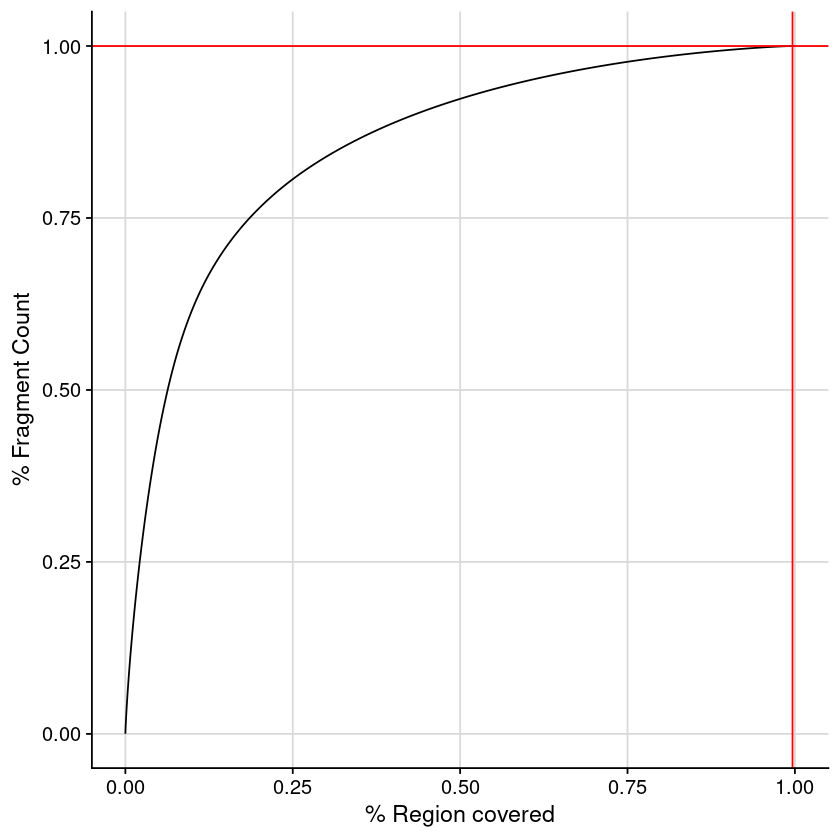

In [37]:
ggplot(dat, aes(x=CumRow, y = CumSum)) + 
    geom_line() + 
    geom_vline(xintercept = num_x, color="red") +
    geom_hline(yintercept = num_y, color="red") +
    labs(x = "% Region covered", y = "% Fragment Count") +
    theme_cowplot() + 
    background_grid()

In [11]:
selectGenes <- function(counts, min.count=10, N=0.90){
 
  lib.size <- colSums(counts)
  MedianLibSize <- median(lib.size)
  CPM.Cutoff <- min.count / MedianLibSize*1e6
  CPM <- edgeR::cpm(counts,lib.size=lib.size)
 
  min.samples <- round(N * ncol(counts))
 
  f1 <- genefilter::kOverA(min.samples, CPM.Cutoff)
  flist <- genefilter::filterfun(f1)
  keep <- genefilter::genefilter(CPM, flist)
 
  ## the same as:
  #keep <- apply(CPM, 1, function(x, n = min.samples){
  #  t = sum(x >= CPM.Cutoff) >= n
  #  t
  #})
 
  return(keep)
}

mat = mat_cnt_unrm
print(dim(mat))
idx = selectGenes(mat, min.count=10, N=0.90)
mat = mat[idx,]
print(dim(mat))

[1] 161187     10


ERROR: Error in loadNamespace(x): there is no package called ‘genefilter’


In [12]:
library(genefilter)

ERROR: Error in library(genefilter): there is no package called ‘genefilter’


In [13]:
## part of filterByExpr source code
large.n = 10 # default
min.prop = 0.7  # default
MinSampleSize <- large.n + (MinSampleSize-large.n)*min.prop
MinSampleSize

ERROR: Error in eval(expr, envir, enclos): object 'MinSampleSize' not found


In [14]:
IQR

new("standardGeneric", .Data = function (x, na.rm = FALSE, type = 7) 
standardGeneric("IQR"), generic = "IQR", package = "BiocGenerics", 
    group = list(), valueClass = character(0), signature = "x", 
    default = new("derivedDefaultMethod", .Data = function (x, 
        na.rm = FALSE, type = 7) 
    diff(quantile(as.numeric(x), c(0.25, 0.75), na.rm = na.rm, 
        names = FALSE, type = type)), target = new("signature", 
        .Data = "ANY", names = "x", package = "methods"), defined = new("signature", 
        .Data = "ANY", names = "x", package = "methods"), generic = "IQR"), 
    skeleton = (new("derivedDefaultMethod", .Data = function (x, 
        na.rm = FALSE, type = 7) 
    diff(quantile(as.numeric(x), c(0.25, 0.75), na.rm = na.rm, 
        names = FALSE, type = type)), target = new("signature", 
        .Data = "ANY", names = "x", package = "methods"), defined = new("signature", 
        .Data = "ANY", names = "x", package = "methods"), generic = "IQR"))(x, 
        na.rm, type))
<bytecode: 0x5653d20b0290>
<environment: 0x5653d20be038>
attr(,"generic")
[1] "IQR"
attr(,"generic")attr(,"package")
[1] "BiocGenerics"
attr(,"package")
[1] "BiocGenerics"
attr(,"group")
list()
attr(,"valueClass")
character(0)
attr(,"signature")
[1] "x"
attr(,"default")
Method Definition (Class "derivedDefaultMethod"):

function (x, na.rm = FALSE, type = 7) 
diff(quantile(as.numeric(x), c(0.25, 0.75), na.rm = na.rm, names = FALSE, 
    type = type))
<bytecode: 0x5653d20bc978>
<environment: namespace:stats>

Signatures:
        x    
target  "ANY"
defined "ANY"
attr(,"skeleton")
(new("derivedDefaultMethod", .Data = function (x, na.rm = FALSE, 
    type = 7) 
diff(quantile(as.numeric(x), c(0.25, 0.75), na.rm = na.rm, names = FALSE, 
    type = type)), target = new("signature", .Data = "ANY", names = "x", 
    package = "methods"), defined = new("signature", .Data = "ANY", 
    names = "x", package = "methods"), generic = "IQR"))(x, na.rm, 
    type)
attr(,"class")
[1] "standardGeneric"
attr(,"class")attr(,"package")
[1] "methods"